In [1]:
# query vs bracket indexing

# create a datframe with 10k rows, then chech the times 
# then create one with 20k rows and so on
# save the results of every iteration in dataframe
# in the end analyze the differences

In [2]:
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt

In [3]:
np.random.seed(123)

In [4]:
test_df = pd.DataFrame(columns = ["A", "B"])
results = pd.DataFrame(columns = ["query", "bracket"])

In [5]:
i = 1
while i <= 100:
    test_df_new = pd.DataFrame()
    test_df_new["A"] = np.random.randint(1, 100, 10000)
    test_df_new["B"] = np.random.randint(1, 100, 10000)
    test_df = pd.concat([test_df, test_df_new], axis = 0)
    
    results_new = pd.DataFrame()
    results_new["df_length_in_k"] = pd.Series(len(test_df))
    results_new["query"] = pd.Series(timeit.timeit('test_df.query("A > 50 & B > 50")', 
                                     number = 100, globals = globals()))
    results_new["bracket"] = pd.Series(timeit.timeit('test_df[(test_df["A"] > 50) \
                                                     & (test_df["B"] > 50)]', 
                                       number = 100, globals = globals()))
    
    results = pd.concat([results, results_new], axis = 0)
    
    i += 1

In [6]:
results["df_length_in_k"] = results["df_length_in_k"] / 1000
results["df_length_in_k"] = results["df_length_in_k"].astype("int")
results["differences"] = results["query"] - results["bracket"]

In [ ]:
print(results)

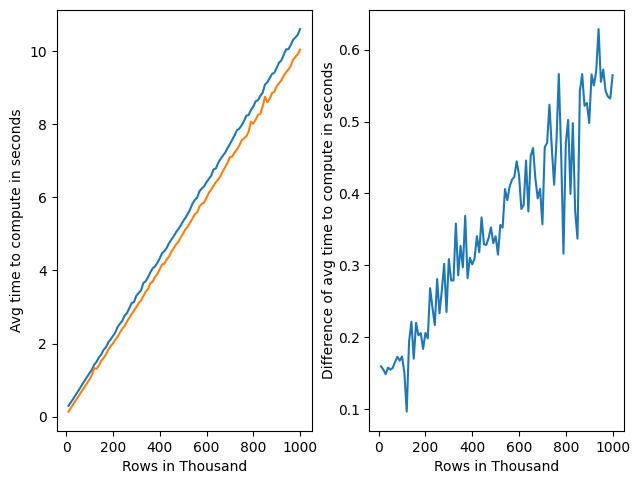

In [8]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout()
ax[0].plot(results["df_length_in_k"], results["query"])
ax[0].plot(results["df_length_in_k"], results["bracket"])
ax[0].set_xlabel("Rows in Thousand")
ax[0].set_ylabel("Avg time to compute in seconds")
ax[1].plot(results["df_length_in_k"], results["differences"])
ax[1].set_xlabel("Rows in Thousand")
ax[1].set_ylabel("Difference of avg time to compute in seconds")
ax[1].yaxis.set_label_coords(-0.13, 0.5)

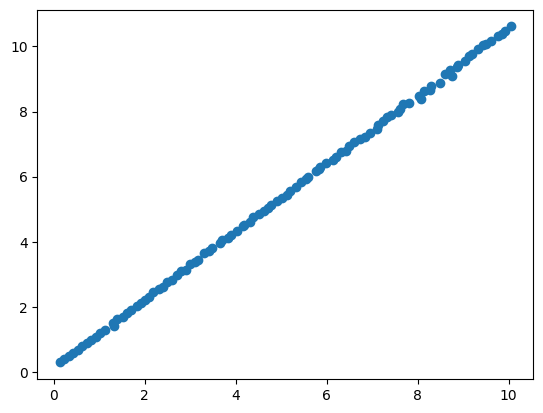

In [9]:
fig, ax = plt.subplots()
ax.scatter(results["bracket"], results["query"])
ax.set_xlabel("Avg time to compute bracket in seconds")
ax.set_ylabel("Avg time to compute query in seconds")